In [24]:
""" Inspired by example from
https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent
Uses the TensorFlow backend
The basic idea is to detect anomalies in a time-series.
"""
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.models import Sequential
from numpy import arange, sin, pi, random
import h5py
%matplotlib notebook


In [25]:
import csv

In [26]:
np.random.seed(1234)

# Global hyper-parameters
sequence_length = 10
epochs = 5
batch_size = 50


In [27]:
def readCSV():
    f = open('../data/cep/ceptrain.csv')
    states = []
    try:
        reader = csv.reader(f)
        for row in reader:
            states.append(row)
    finally:
        f.close()
    train_data = np.array(states)
    print (train_data.shape)
    return train_data

In [28]:
readCSV()

(204205, 1)


array([['0.0'],
       ['0.0'],
       ['0.0'],
       ..., 
       ['0.0'],
       ['0.0'],
       ['4.0']], 
      dtype='<U5')

In [29]:
def z_norm(result):
    result = np.float64(result)
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean




In [30]:
def get_split_prep_data(train_start, train_end,
                        test_start, test_end):
    #data = gen_wave()
    data = readCSV()
    print("Length of Data", len(data))

    # train data
    print("Creating train data...")

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)

    result, result_mean = z_norm(result)

    print ("Mean of train data : ", result_mean)
    print ("Train data shape  : ", result.shape)
    #print result
    train = result[train_start:train_end, :]
    #np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    #X_train, y_train = dropin(X_train, y_train)

    print("Shape X_train", np.shape(X_train))
    print("Shape y_train", np.shape(y_train))

    # test data
    print ("Creating test data...")

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)
    result, result_mean = z_norm(result)

    print ("Mean of test data : ", result_mean)
    print ("Test data shape  : ", result.shape)

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_test", np.shape(X_test))
    print("Shape y_test", np.shape(y_test))


    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test

In [76]:
trainlist=[]
for j in range(1,8):
    name = 'cep/cep00'+str(j)+'_pausetime.csv'
    print (name)
    trainlist.insert(j,name)

anomalylist=[]
anomalylist.insert(1,'cep/2.csv')
# anomalylist.insert(1,'anomaly_pausetime2.csv')

# for j in range(1,8):
#     name = 'cep/cep00'+str(j)+'_pausetime.csv'
#     print (name)
#     anomalylist.insert(j,name)

cep/cep001_pausetime.csv
cep/cep002_pausetime.csv
cep/cep003_pausetime.csv
cep/cep004_pausetime.csv
cep/cep005_pausetime.csv
cep/cep006_pausetime.csv
cep/cep007_pausetime.csv


In [32]:
def get_training_data(trainlist):
    series=[]
    for i in range(0,len(trainlist)):
        series.insert(i,np.array(openFile('../data/'+trainlist[i])))
    return series

In [33]:
def openFile(file):
    f = open(file)
    try:
        reader = csv.reader(f)
        floats = []
        for row in reader:
            floats.append(row)
    finally:
        f.close()
    return floats

In [34]:
def get_anomaly_data(anomalylist):
    series=[]
    for i in range(0,len(anomalylist)):
        series.insert(i,np.array(openFile('../data/'+anomalylist[i])))
    return series

In [35]:
train= get_training_data(trainlist)
train_data = np.vstack(train)

In [36]:
train_data.shape

(205290, 1)

In [37]:
def train_anomaly_data():
    train= get_training_data(trainlist)
    train_data = np.vstack(train)
    print("Length of Training data", len(train_data))

    # train data
    print("Creating train data...")

    result = []
    for index in range(0, train_data.size- sequence_length):
        result.append(train_data[index: index + sequence_length])
    result = np.array(result)

#     result, result_mean = z_norm(result)

#     print ("Mean of train data : ", result_mean)
#     print ("Train data shape  : ", result.shape)
    #print result
    train = result[0:train_data.size, :]
    #np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    #X_train, y_train = dropin(X_train, y_train)

    print("Shape X_train", np.shape(X_train))
    print("Shape y_train", np.shape(y_train))

    # test data
    print ("Creating test data...")
    anomaly = get_anomaly_data(anomalylist)
    anomaly_data = np.vstack(anomaly)
    
    print("Length of anomaly data", len(anomaly_data))
    
    result = []
    for index in range(0, anomaly_data.size - sequence_length):
        result.append(anomaly_data[index: index + sequence_length])
    result = np.array(result)
#     result, result_mean = z_norm(result)

#     print ("Mean of test data : ", result_mean)
#     print ("Test data shape  : ", result.shape)

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_test", np.shape(X_test))
    print("Shape y_test", np.shape(y_test))


#     X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#     X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test
    

In [38]:
# train_anomaly_data()

In [16]:
def build_model():
    model = Sequential()
    layers = {'input': 1, 'hidden1': 10, 'hidden2': 20, 'hidden3': 10, 'output': 1}

    model.add(LSTM(
            input_length=sequence_length - 1,
            input_dim=layers['input'],
            output_dim=layers['hidden1'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden2'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden3'],
            return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
            output_dim=layers['output']))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

In [17]:
def run_network(model=None, data=None):
    global_start_time = time.time()

    if data is None:
        print ('Loading data... ')
        # train on first 700 samples and test on next 300 samples (has anomaly)
#         X_train, y_train, X_test, y_test = get_split_prep_data(0, 200000,200001, 204206)
        X_train, y_train, X_test, y_test = train_anomaly_data()

    else:
        X_train, y_train, X_test, y_test = data

    print ('\nData Loaded. Compiling...\n')

    
    if model is None:
        model = build_model()

    try:
        print("Training...")
        model.fit(
                X_train, y_train,
                batch_size=batch_size, nb_epoch=epochs, validation_split=0.05)
        print("Predicting...")
        predicted = model.predict(X_test)
        print("Reshaping predicted")
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print("prediction exception")
        print ('Training duration (s) : ', time.time() - global_start_time)
        return model, y_test, 0

    print( 'Training duration (s) : ', time.time() - global_start_time)

    return model, y_test, predicted


In [18]:
def showPlot(Predicted, y_test):
    try:
        plt.figure(1)
        plt.subplot(311)
        plt.title("Actual Test Signal w/ Anomalies")
        plt.plot(y_test[:len(y_test)], 'b')
        plt.subplot(312)
        plt.title("Predicted Signal")
        plt.plot(predicted[:len(y_test)], 'g')
        plt.subplot(313)
        plt.title("Squared Error")
        y_te = np.array(y_test,dtype=float)
        pred = np.array(predicted,dtype=float)

        mse = ((y_te - pred) ** 2)
        plt.plot(mse, 'r')
        plt.show()
        print("success")
        plt.savefig( 'myfig.png' )
    except Exception as e:
        print("plotting exception")
        print (str(e))

In [72]:
model,y_test,predicted=run_network()

Loading data... 
Length of Training data 205290
Creating train data...
Shape X_train (205280, 9, 1)
Shape y_train (205280, 1)
Creating test data...
Length of anomaly data 252
Shape X_test (242, 9, 1)
Shape y_test (242, 1)

Data Loaded. Compiling...

Compilation Time :  0.033905982971191406
Training...
Train on 195016 samples, validate on 10264 samples
Epoch 1/5
195016/195016 [==============================] - 391s - loss: 8.1008 - val_loss: 14.8644
Epoch 2/5
195016/195016 [==============================] - 369s - loss: 8.0994 - val_loss: 14.8665
Epoch 3/5
195016/195016 [==============================] - 423s - loss: 8.1014 - val_loss: 14.8625
Epoch 4/5
195016/195016 [==============================] - 388s - loss: 8.1017 - val_loss: 14.8659
Epoch 5/5
195016/195016 [==============================] - 405s - loss: 8.1008 - val_loss: 14.8662
Predicting...
Reshaping predicted
Training duration (s) :  2139.0513019561768


In [73]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [61]:
X_train, y_train, X_test, y_test = train_anomaly_data()
predicted = model.predict(X_test)
predicted = np.reshape(predicted, (predicted.size,))

Length of Training data 205290
Creating train data...
Shape X_train (205280, 9, 1)
Shape y_train (205280, 1)
Creating test data...
Length of anomaly data 1000
Shape X_test (990, 9, 1)
Shape y_test (990, 1)


<IPython.core.display.Javascript object>


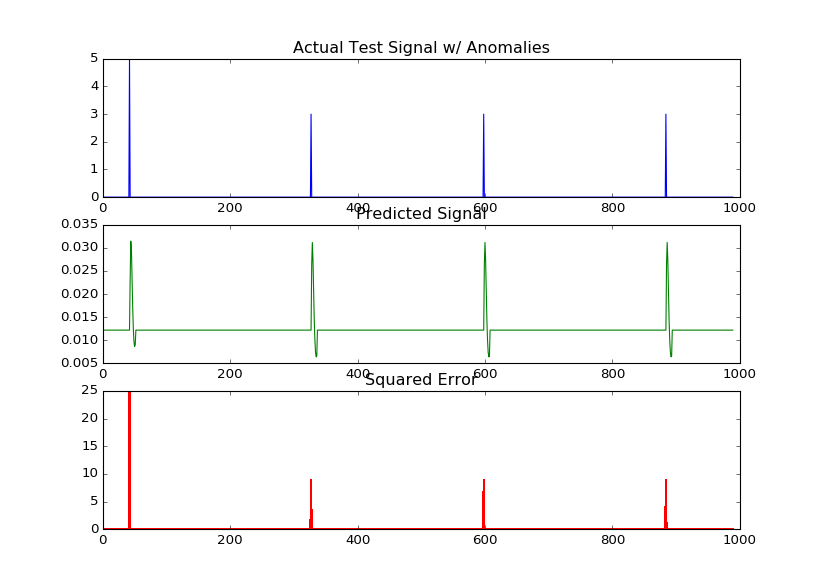

success


In [62]:
showPlot(predicted,y_test)

In [77]:
X_train, y_train, X_test, y_test = train_anomaly_data()
predicted = model.predict(X_test)
# predicted = np.reshape(predicted, (predicted.size,))

Length of Training data 205290
Creating train data...
Shape X_train (205280, 9, 1)
Shape y_train (205280, 1)
Creating test data...
Length of anomaly data 1010
Shape X_test (1000, 9, 1)
Shape y_test (1000, 1)


<IPython.core.display.Javascript object>


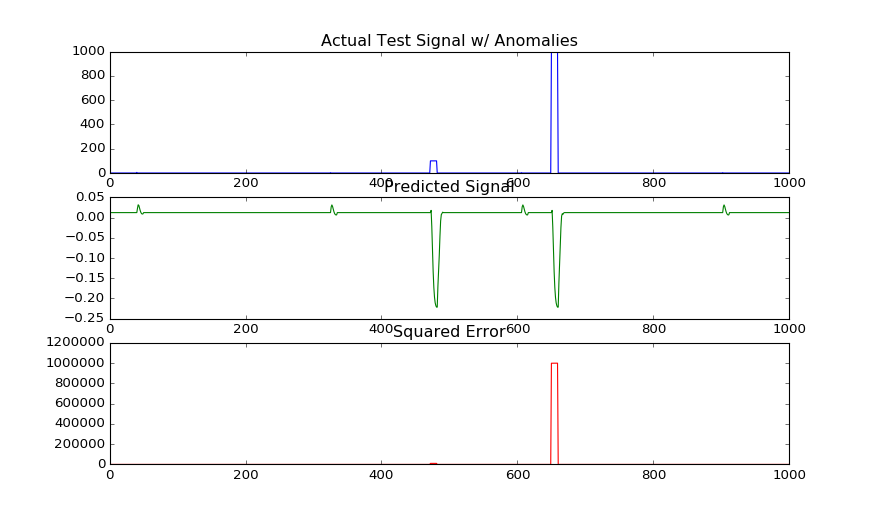

success


In [78]:
showPlot2(predicted,y_test)

In [56]:
def showPlot2(Predicted, y_test):
    try:
        plt.figure(2)
        plt.subplot(311)
        plt.title("Actual Test Signal with Anomalies")
        plt.plot(y_test[:len(y_test)], 'b')
        plt.subplot(312)
        plt.title("Predicted Signal")
        plt.plot(predicted[:len(y_test)], 'g')
        plt.subplot(313)
        plt.title("Squared Error")
        y_te = np.array(y_test,dtype=float)
        pred = np.array(predicted,dtype=float)

        mse = ((y_te - pred) ** 2)
        plt.plot(mse, 'r')
        plt.show()
        print("success")
        plt.savefig( 'myfig.png' )
    except Exception as e:
        print("plotting exception")
        print (str(e))

In [74]:
X_train, y_train, X_test, y_test = train_anomaly_data()
predicted = model.predict(X_test)
# predicted = np.reshape(predicted, (predicted.size,))

Length of Training data 205290
Creating train data...
Shape X_train (205280, 9, 1)
Shape y_train (205280, 1)
Creating test data...
Length of anomaly data 252
Shape X_test (242, 9, 1)
Shape y_test (242, 1)


<IPython.core.display.Javascript object>


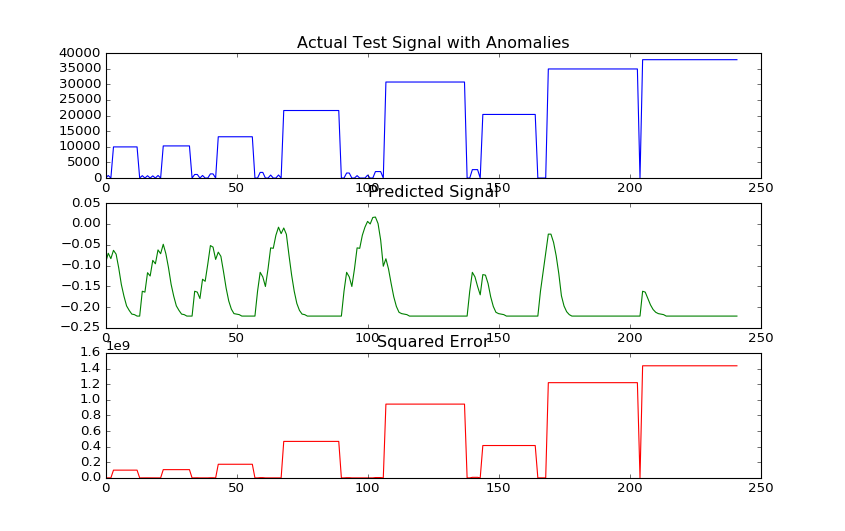

success


In [75]:
showPlot3(predicted,y_test)

In [72]:
def showPlot3(Predicted, y_test):
    try:
        plt.figure(3)
        plt.subplot(311)
        plt.title("Actual Test Signal with Anomalies")
        plt.plot(y_test[:len(y_test)], 'b')
        plt.subplot(312)
        plt.title("Predicted Signal")
        plt.plot(predicted[:len(y_test)], 'g')
        plt.subplot(313)
        plt.title("Squared Error")
        y_te = np.array(y_test,dtype=float)
        pred = np.array(predicted,dtype=float)

        mse = ((y_te - pred) ** 2)
        plt.plot(mse, 'r')
        plt.show()
        print("success")
        plt.savefig( 'myfig.png' )
    except Exception as e:
        print("plotting exception")
        print (str(e))